In [1]:
# Load libraries for analysis and visualization
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
import lightgbm as lgb
%matplotlib inline

import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

# Machine learning libraries
import sys
sys.path.append('/Users/minjielu/anaconda3/envs/python/lib/python3.5/site-packages')

import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import sklearn         # Collection of machine learning algorithms
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [69]:
# New method
from scipy import stats
train['target_n'] = 0.0
for ind, row in train.iterrows():
    train.loc[ind,train.columns == 'target_n'] = stats.percentileofscore(np.log1p(row[2:][row != 0].unique()[2:].astype(float)),np.log1p(row['target'])) 

In [28]:
# New method
# train_y = train['target_n']
train_x = train.copy()
for column in train_x.columns:
    train_x.loc[train_x[column] != 0,column] = 1

In [86]:
train['ID']

0       000d6aaf2
1       000fbd867
2       0027d6b71
3       0028cbf45
4       002a68644
5       002dbeb22
6       003925ac6
7       003eb0261
8       004b92275
9       0067b4fef
10      00689ee2c
11      0069007ac
12      006b60dd7
13      008057126
14      008825875
15      0096e207e
16      00c2deb75
17      00ce2134f
18      00e7ba121
19      00ecc53f2
20      00fb69afe
21      00fc78888
22      0110c05db
23      0126abf21
24      012800ace
25      012d8bc84
26      012d9baab
27      01346ebb9
28      013842698
29      01432f2c7
30      014aa259b
31      015a1c656
32      0161ebeea
33      0163ff75d
34      01666d7a4
35      017ad263f
36      01a09167b
37      01b1dd07c
38      01b4bd64a
39      01b4c938b
40      01bf430de
41      01db20056
42      020b34e31
43      02111eb6f
44      021f11b0c
45      025b6897a
46      026c1767f
47      0270d1d7b
48      027484f21
49      028020c53
50      02869e5f9
51      02aa73470
52      02c00f064
53      02d144b6b
54      02d2b0a64
55      02

In [119]:
train.loc[train['913970e60'] != 0,'target_n']

338     91.666667
579     50.000000
611     69.230769
683     58.620690
788     44.444444
831     91.891892
1314    27.272727
2003    44.186047
2040    62.068966
2410    10.810811
2668    75.000000
2790     4.230769
2865    11.764706
3918    84.210526
4065    83.333333
4150    74.509804
4378    60.465116
Name: target_n, dtype: float64

In [72]:
train[['target_n','target_n_preds']]

target_n  target_n_preds
0      98.000000       39.782187
1       0.000000       35.924816
2     100.000000       44.310569
3      70.000000       48.993134
4      91.666667       38.493374
5      62.264151       57.231060
6      57.692308       57.338232
7      15.789474       51.616192
8      56.250000       65.851932
9      44.444444       51.882734
10     37.209302       40.793040
11     97.142857       64.641543
12     71.875000       38.589977
13     50.568182       48.945739
14      0.000000       51.480983
15     57.142857       55.818790
16     42.307692       55.910125
17     57.142857       46.477503
18     53.623188       42.226679
19     16.417910       39.195870
20     35.714286       45.962450
21     78.282828       62.973309
22     83.613445       54.967884
23     76.576577       45.423455
24     55.555556       56.783942
25     52.500000       46.989860
26     73.913043       40.867289
27     31.343284       64.489288
28     31.250000       52.004131
29     58.536585       46.677167
30     40.000000       52.234358
31    100.000000       51.941485
32     65.517241       52.680093
33    100.000000       51.535367
34     50.000000       60.997189
35     64.285714       45.389906
36           NaN       52.738941
37     76.923077       51.160522
38     75.000000       55.696750
39     77.142857       53.315469
40    100.000000       50.687647
41     38.888889       42.787483
42     80.487805       54.171132
43           NaN       49.788786
44     85.950413       53.901408
45     64.473684       52.605329
46     50.000000       50.081239
47           NaN       52.738941
48     96.341463       48.103298
49     83.333333       56.378878
50     71.428571       48.224487
51     91.666667       43.667256
52     50.000000       49.708960
53     20.000000       59.263055
54           NaN       49.497560
55     20.000000       46.094508
56     46.153846       55.645134
57     25.954198       54.394048
58     15.384615       43.774285
59     57.777778       53.666092
60     91.044776       48.758459
61     54.838710       41.055248
62    100.000000       57.595843
63           NaN       52.390518
64     95.833333       55.147009
65     40.000000       54.348773
66     62.000000       37.499817
67     73.469388       52.648097
68     14.080460       53.604921
69     33.333333       49.617678
70     93.670886       59.129441
71     21.739130       30.705109
72     12.500000       47.084649
73     64.516129       51.408205
74     34.782609       40.654038
75      0.000000       56.497843
76     93.333333       58.040267
77      2.857143       59.681093
78     17.777778       43.872904
79    100.000000       56.549223
80     47.272727       44.469317
81     55.555556       68.084242
82    100.000000       53.526457
83     42.857143       51.847507
84     75.000000       45.082521
85     86.666667       50.330586
86     50.000000       47.596277
87      0.000000       52.777954
88     70.000000       59.117703
89      0.000000       51.039243
90      6.250000       51.920994
91     60.526316       53.519596
92     98.148148       53.321439
93      0.000000       48.175391
94      7.042254       29.432049
95     22.222222       35.500257
96     38.461538       55.515755
97     16.806723       31.005452
98     38.333333       45.058982
99     35.714286       46.937350
100    14.035088       49.537599
101    36.363636       50.494931
102    50.000000       47.432131
103    60.344828       50.434743
104    51.851852       53.928333
105   100.000000       50.964216
106     0.000000       52.298189
107    51.111111       59.038575
108    45.901639       54.844157
109   100.000000       45.592093
110     0.000000       52.939703
111    33.333333       52.104397
112    75.000000       45.368289
113    17.142857       47.638856
114    57.424442       50.392476
115    83.333333       50.181427
116    41.463415       47.802289
117    31.250000       46.335299
118    50.000000       47.014750
119    75.000000       64.586900
120    46.15384

In [304]:
pd.set_option('display.max_columns',5000)
sample = train[train['target'] == 10000000.00].iloc[13].T
sample = sample.to_frame()
sample.columns = ['value']

print(sample.loc[sample['value'] != 0].shape[0])
print(sample['value'].unique()[2:].astype(float))
print(np.percentile(np.log1p(sample['value'].unique()[2:].astype(float)),25))
print(np.percentile(np.log1p(sample['value'].unique()[2:].astype(float)),50))
print(np.percentile(np.log1p(sample['value'].unique()[2:].astype(float)),75))
print(np.log1p(10000000.00))

sample = sample.drop(['ID','target'])
sample = pd.concat([sample,nonzero_corr],axis=1)

sample[sample['value'] != 0]

73
[0.00e+00 1.32e+07 6.80e+07 1.90e+07 2.00e+07 2.50e+07 2.72e+08 2.40e+08
 2.00e+08 5.00e+07 1.60e+07 9.00e+07 1.08e+08 5.00e+06]
16.631061904468616
17.38096000311245
18.452061405612227
16.118095750958314


value    target  nonzero_cnt
963a49cdc   1.32e+07  0.424268         1471
4e86dd8f3    6.8e+07 -0.008064          326
68a945b18   1.32e+07  0.472264          849
90b0ed912    1.9e+07  0.173780          102
935ca66a9   1.32e+07  0.468111          893
4fc9da4e3      2e+07 -0.110815           11
861076e21   1.32e+07  0.432921          920
d7285f250    2.5e+07  0.064456          208
26fc93eb7   1.32e+07  0.469027         1492
0572565c2   1.32e+07  0.379296         1547
66ace2992   1.32e+07  0.411950         1521
fb49e4212   1.32e+07  0.459505         1482
6619d81fc   1.32e+07  0.355052         1533
8d4d84ddc   2.72e+08  0.141147          189
fc99f9426   1.32e+07  0.448439         1518
bd6da0cca   1.32e+07  0.473125          871
1db387535   1.32e+07  0.385282         1525
ea772e115   1.32e+07  0.541224          824
ad009c8b9   1.32e+07  0.555233          842
51d4053c7   1.32e+07  0.400950          781
2ec5b290f   1.32e+07  0.369517         1477
44d5b820f   1.32e+07  0.516704          791
0ff32eb98   1.32e+07  0.361124         1565
166008929   1.32e+07  0.417212          927
b7c931383   1.32e+07  0.365005          796
241f0f867   1.32e+07  0.377511         1461
cbb673163   1.32e+07  0.480560          868
1931ccfdd   1.32e+07  0.365666         1509
f02ecb19c   1.32e+07  0.450584          920
1fe5d56b9   1.32e+07  0.510235          809
b261b0abe  240000000  0.129033          106
d26279f1a      2e+08  0.151674          593
c612c5f8f   50000000  0.163775          159
834fb292d   68000000  0.066720           95
ff65215db    2.4e+08  0.159867          622
58ed8fb53   2.72e+08  0.180828          597
7db1be063      2e+08  0.156518          312
91f701ba2   1.32e+07  0.370076         1560
8c922fa9a      2e+08  0.145177           98
ca2b906e8   1.32e+07  0.459949          901
703885424   1.32e+07  0.383537         1513
f97d9431e   1.32e+07  0.458515          903
62fb56487   1.32e+07  0.541252          842
324921c7b   1.32e+07  0.417909         1504
c0d2348b7   1.32e+07  0.477172          883
491b9ee45   1.32e+07  0.388403         1523
c8d582dd2   1.32e+07  0.523263          886
175891ff4    1.6e+07 -0.134613           15
c10f31664   1.32e+07  0.526799          849
4bcf15776   1.32e+07  0.512704          812
70feb1494   1.32e+07  0.456874         1532
adb64ff71   1.32e+07  0.371921         1547
11e12dbe8   1.32e+07  0.470562          928
9de83dc23   1.32e+07  0.415369          902
62e59a501   1.32e+07  0.382749         1477
5c6487af1   1.32e+07  0.380030         1539
f1b6cc03f      9e+07  0.098868          186
bb0ce54e9   1.32e+07  0.470090          889
f74e8f13d   1.32e+07  0.509410         1494
4ead853dc    1.9e+07  0.190185          602
77deffdf0   1.32e+07  0.454456          892
c5a231d81   1.32e+07  0.369607         1565
e176a204a   1.32e+07  0.354346         1535
a09a238d0   1.32e+07  0.460360          893
190db8488   1.32e+07  0.335689         1528
c47340d97   1.32e+07  0.393135         1555
2cb73ede7      1e+07  0.193462          583
857020d0f   1.08e+08  0.237600          188
4634c8fae    5000000  0.037190           72
8781e4b91   1.32e+07  0.499983          877
23310aa6f   1.32e+07  0.366651         1532

In [205]:
sample = train[train['target'] == 600000].iloc[1].T
sample = sample.to_frame()
sample.columns = ['value']

sample = sample.drop(['ID','target'])
sample = pd.concat([sample,nonzero_corr],axis=1)

sample[sample['value'] != 0]


value    target  nonzero_cnt
f115e74c0    3.2e+06  0.068538          224
df08959aa    3120000 -0.022263           48
2f8931894   45000000 -0.248925           50
9aa27017e     200000  0.257255          554
1ba077222   3.71e+06  0.199846          227
b43a7cfd5   1.96e+06  0.397979         1438
157c8b45f   6.76e+07 -0.196366           40
32174174c      1e+07  0.393072          719
1254b628a  1.874e+07  0.148079          286
bb12b7d99    1524000 -0.224330           20
b3dbb1222    2246000 -0.102468           44
99cc87fd7     200000 -0.056960          484
a7f94dd85    1.4e+07 -0.082949           23
236cc1ff5     200000  0.236194          582
0397f7c9b     268000  0.263211          506
031490e77   2.98e+06  0.175225          651
0d6d7ec0b  100000000  0.199770           37
9fd594eec    6.5e+07  0.454730         1520
eae884486    6.5e+07  0.237618          201
afb6b8217      4e+07 -0.041880          468
99e779ee0    2.2e+06  0.253025          602
d3b9b9a70      2e+07  0.391015          200
324921c7b      2e+07  0.417909         1504
f7d385108      1e+08  0.143544           29
123ba6017     484000  0.097955          230
d0803e3a1    9.2e+06  0.323140          475
62e59a501      1e+07  0.382749         1477
f1851d155   1.96e+06  0.742440          351
77f5250e3   45000000 -0.052314           45
1847c8140  100000000 -0.074453           30

In [115]:
sample = train[train['ID'] == '2a02b036d'].T
sample.columns = ['value']

print(sample.loc[sample['value'] != 0,'value'].unique()[2:].astype(float))
print(np.percentile(np.log1p(sample.loc[sample['value'] != 0,'value'].unique()[2:].astype(float)),20))
print(np.percentile(np.log1p(sample.loc[sample['value'] != 0,'value'].unique()[2:].astype(float)),50))
print(np.percentile(np.log1p(sample.loc[sample['value'] != 0,'value'].unique()[2:].astype(float)),75))
print(np.log1p(train[train['ID'] == '2a02b036d']['target']))


sample = sample.drop(['ID','target'])
sample = pd.concat([sample,nonzero_corr],axis=1)

sample[sample['value'] != 0]


[2.50000000e+06 1.10000000e+06 4.80980000e+04 1.87700000e+07
 2.98820000e+04 5.29440000e+04 5.41380000e+04 2.68800000e+04
 9.32500000e+04 5.00000000e+06 1.15400000e+07 9.38900000e+04
 2.05000000e+06 2.93240000e+04 5.13366600e+04 8.00000000e+06
 1.69300000e+05 1.10000000e+05 1.44000000e+06 2.69200000e+06
 2.20000000e+06 2.33330000e+05 2.15000000e+06 1.40000000e+08
 6.00000000e+06 1.00000000e+06 1.40000000e+06 1.00000000e+08
 1.60000000e+06 5.15000000e+06 2.00000000e+06 1.44000000e+07
 2.47300000e+06 5.33333334e+06 1.14700000e+07 7.15000000e+06
 8.60000000e+06 2.00000000e+08 3.00000000e+06 2.00000000e+07
 9.24760000e+04 8.72920000e+04 2.40000000e+06 1.00000000e+07
 8.10000000e+06 2.00000000e+05 4.00000000e+05 3.38000000e+05
 8.50000000e+06 3.21760000e+05 1.20000000e+07 4.94080000e+04
 1.26540000e+05 2.58203340e+05 7.87060000e+04 3.23332720e+05
 4.12000000e+04 4.83290000e+04 1.31214000e+05 1.92000000e+06
 4.93000000e+06 3.04560000e+04 1.10000000e+07 9.66440000e+04
 3.26000000e+06 8.600000

value  \
003da5628         1.733e+06   
007d71f12           4000000   
00f844fea          3.26e+06   
027e67ec7           2000000   
04b88be38              8000   
0572565c2          7.15e+06   
05b0f3e9a             36394   
05d17ab7a          2.15e+06   
06be6c2bb            380370   
06f6a7287           1920000   
070f95c99           8.5e+06   
07746dcda             1e+06   
07c9d1f37           1.1e+07   
07cb6041d           2.4e+06   
092271eb3       7.46667e+06   
093cfe734         200000000   
0a03426de           8600000   
0aea1fd67             89394   
0badd2fa2          1.44e+06   
0c8063d63           5.4e+06   
0d51722ca           2.5e+06   
0d866c3d7           1.1e+06   
0ff32eb98         4.465e+06   
110e4132e           1.6e+07   
11114a47a           1.2e+06   
119230239            338000   
11e12dbe8         3.362e+06   
122c135ed           1.8e+06   
123ba6017             3e+06   
134ac90df            760000   
1389b944a             33200   
1477c751e             1e+06   
14a22ab1a             30456   
15ace8c9f            760000   
166008929             4e+06   
16bf5a9a2             32518   
18c35d2ea            186532   
1906a5c7e       1.05503e+06   
190db8488           5.8e+06   
1931ccfdd           3.6e+07   
1977eaf08           8.1e+06   
1bc285a83            105984   
1beb0ce65            101724   
1c554649c           2000000   
1d04efde3             3e+06   
1d5df91e2             1e+06   
1db387535             18000   
1dd7bca9f         1.755e+07   
1eec37deb           4800000   
1fe5d56b9             6e+06   
20aa07010           2.5e+06   
212efda42             14258   
215ffb087           4000000   
2191d0a24            321760   
21bd61954           1.1e+06   
22ed6dba3         1.877e+07   
22ff4e1b8           6600000   
235163358             23680   
235b8beac             76080   
236cc1ff5            200000   
23c780950            431179   
24018f832            524000   
241f0f867        2.0325e+07   
2488e17f5             1e+07   
26628e8d8          1.32e+07   
26df61cc3            280655   
279d380ce          60000000   
27a7cc0ca            105258   
29ab304b9       6.08775e+06   
2ac62cba5             96644   
2b2b5187e             18000   
2b54cddfd          11470000   
2be024de7            640000   
2d065b147             53534   
2d60e2f7a             30818   
2d6bd8275             54138   
2dbeac1de             93302   
2e103d632         3.226e+06   
2ed7f4cca          10000000   
2eeadde2b             6e+06   
2f09a1edb             78706   
2f26d70f4         3.016e+06   
324921c7b             6e+06   
324aaa96f           1.1e+06   
35c5fe0ff          14400000   
3607eabff             9e+06   
37c85a274            133208   
39b3c553a           2000000   
3d6d38290         2.762e+06   
3d71c02f0              3720   
3f02111a8           4400000   
402bb0761            569479   
408d191b3             93890   
44d5b820f             2e+06   
44f2f419e             96070   
45293f374            800000   
47cd6e6e4            233330   
4824c1e90            306428   
482b04cba         2.473e+06   
49ca7ff2e            400000   
4baa9ff99            131214   
4e22de94f            291420   
4ead853dc            105258   
4f325b517             87292   
5030aed26             17982   
51d4053c7           9.4e+06   
5291be544             69686   
5374a601b            176166   
54d3e247f             49408   
556fb6bc0          10460000   
572a7f60f          20000000   
57dd44c29             2e+07   
58007f90b           1000000   
581515692           2000000   
58232a6fb           1.8e+06   
58a1cb6eb          80000000   
58e2e02e6         2.692e+06   
597d78667            600000   
59dfc16da          2.05e+06   
5ab3be3e1            258203   
5ac278422             1e+06   
5ac7e84c4             30456   
5d3b81ef8            800000   
60307ab41            521102   
608639adb           1.4e+07   
6186ea570             93250   
62d0edc4f           1800000   
62e59a501             2e+06   
62fb56487         1.154

In [209]:
np.log1p(600000)

13.304686600863562

In [107]:
sample = train[train['target'] == 600000].iloc[3].T
sample = sample.to_frame()
sample.columns = ['value']
print(sample['value'].unique()[2:].astype(float))
print(np.percentile(np.log1p(sample['value'].unique()[2:].astype(float)),25))
print(np.percentile(np.log1p(sample['value'].unique()[2:].astype(float)),50))
print(np.percentile(np.log1p(sample['value'].unique()[2:].astype(float)),75))

[       0. 10000000.  9000000. 36000000.]
12.0095514348087
16.065415498684956
16.438329194268277


In [108]:
sample = train[train['target'] == 600000].iloc[4].T
sample = sample.to_frame()
sample.columns = ['value']
print(sample['value'].unique()[2:].astype(float))
print(np.percentile(np.log1p(sample['value'].unique()[2:].astype(float)),25))
print(np.percentile(np.log1p(sample['value'].unique()[2:].astype(float)),50))
print(np.percentile(np.log1p(sample['value'].unique()[2:].astype(float)),75))

[0.0000000e+00 5.3000000e+06 9.8000000e+05 1.2000000e+04 6.6000000e+05
 4.6000000e+06 4.4000000e+06 2.8000000e+06 6.7500000e+06 2.2000000e+06
 6.4000000e+03 6.9000000e+05 2.0000000e+06 2.5900000e+06 4.0000000e+06
 4.0000000e+05 2.4500000e+05 6.8000000e+05 2.0500000e+06 1.7000000e+06
 2.4000000e+06 1.1000000e+06 6.8333334e+05 9.5000000e+05]
13.422386318092826
14.128480522060329
14.786659197904081


In [4]:
train['sum'] = train.loc[:,(train.columns != 'ID') & (train.columns != 'traget')].sum(axis=1)
correlations = train.corr()


In [5]:
correlations = correlations.loc[correlations.index == 'target',:].sort_values(['target'],axis=1,ascending=False)

In [6]:
#pd.set_option('display.max_columns',2000)
#correlations

In [3]:
nonzero_corr = []
for column in train.columns:
    if column != 'ID' and column != 'target':
        train_1 = train[train[column] != 0][['target',column]]
        corr_tmp = train_1.corr()
        nonzero_corr.append([corr_tmp.loc['target',column],train_1.shape[0]])

In [4]:
column_label = list(train.columns)
column_label.pop(0)
column_label.pop(0)

'target'

In [5]:
nonzero_corr = pd.DataFrame(nonzero_corr,columns=['target','nonzero_cnt'],index=column_label)
#nonzero_corr = nonzero_corr.sort_values(['target'])
#nonzero_corr[(nonzero_corr['target'] < 0.4) & (nonzero_corr['target'] > -0.01)].shape[0]
#nonzero_corr.shape[0]
#nonzero_corr

In [140]:
pd.set_option('display.max_rows',3000)
train.loc[train['6b119d8ce'] != 0,['6b119d8ce','target','target_n']]

6b119d8ce       target    target_n
8        16000.00    979000.00   56.250000
13      600000.00   7000000.00   50.568182
21      760000.00   3266666.66   78.282828
22     1298000.00   6140000.00   83.613445
73      530000.00   4000000.00   64.516129
74    25000000.00  32500000.00   34.782609
81       16000.00   3925333.34   55.555556
95    40000000.00  30000000.00   22.222222
114     600000.00   3095200.00   57.424442
126    1400000.00  20000000.00  100.000000
127      40000.00  10814666.66   75.035663
143   40000000.00  32000000.00   22.857143
151     598857.14    200000.00   14.285714
171     400000.00   5000000.00   71.794872
181    2500000.00   1400000.00   34.210526
197     500000.00   1900000.00   76.470588
211     120000.00    300000.00   11.764706
214     816000.00   5187333.34   66.844208
230   30000000.00  30000000.00   23.913043
231    2078000.00   1192000.00   32.460733
235    1400000.00    406000.00   26.615385
245    1470000.00   1477600.00   52.136752
251    3407000.00   1610000.00   29.464286
284     354000.00  10200000.00   77.777778
298    2000000.00   4000000.00   77.777778
302     500000.00   2000000.00   80.000000
303     354000.00  10000000.00   75.000000
314    3304000.00   1809333.34   52.857143
334    2518000.00   3034400.00   39.015152
359    8720000.00    980000.00   34.513274
362    2200000.00   2060000.00   62.758621
369     637000.00  10849666.66   92.139738
375    4067000.00  16991333.34   91.489362
378    1470000.00   2352551.72   60.681818
380     354000.00    350000.00   16.393443
391    3559333.34   3938750.00   68.619247
404    3740000.00   3342666.66   60.434783
412       2000.00   4234800.00   65.217391
418    1700000.00    370000.00   23.687943
424     500000.00   1000000.00   13.526570
426   30000000.00  30000000.00   23.404255
445    1890000.00   1258800.00   34.558824
461   20000000.00  25000000.00   21.875000
462   30000000.00  38571428.58   48.979592
475     354000.00   3320000.00   60.465116
481     300000.00   1500000.00   57.894737
510   20000000.00  22000000.00   17.647059
511    1470000.00    296444.44   20.588235
517    1439000.00   1190000.00   35.555556
526     700000.00     58000.00   29.411765
532   32500000.00  33333333.34   28.125000
540     500000.00   2500000.00   86.363636
562   20000000.00  20000000.00   17.142857
603    4096000.00   3743666.66   64.285714
611     120000.00   1500000.00   69.230769
625    1470000.00    550000.00   30.508475
626    3310000.00  11115200.00   77.205882
650      60000.00    380000.00   24.383917
655    2000000.00   2050000.00   42.857143
665   10440000.00   8000000.00   47.368421
673     598857.14  10400000.00   96.052632
680     598857.14    416666.66   44.117647
681     100000.00   1310000.00   54.347826
720   20000000.00  38000000.00   52.380952
722   20000000.00  18500000.00    8.823529
748    2000000.00   5300000.00  100.000000
771     400000.00   1333333.34   61.538462
777      79000.00  10000000.00   86.111111
788     120000.00   1000000.00   44.444444
791    4000000.00   1392666.66   31.535270
806    1134000.00  18383714.28   97.071130
814    1400000.00   2900000.00   72.413793
816    1470000.00   1586888.88   54.242424
831     120000.00   6000000.00   91.891892
842    1800000.00    200000.00    1.895735
853    1530000.00   3200000.00   72.093023
856    2194000.00    530000.00   16.942149
862    2000000.00   9260000.00   60.317460
881      10000.00     74000.00   17.567568
891    1400000.00   8000000.00   88.888889
898   20000000.00  28750000.00   31.111111
904    2772000.00    863625.00   17.621145
907    2000000.00   4600000.00   83.333333
912     168000.00   1110333.34   36.546185
923    3360000.00    220000.00    7.042254
941   50000000.00  30000000.00   20.588235
943     180000.00   1859333.34   45.130316
955    3262666.66   3886333.34   66.942149
956     500000.00     36000.00   19.512195
969     400000.00   1400000.00   64.705882
972    1000000.00   1050000.00   48.351648
974    2000000.00    400000.00   10.000000
1007    4

In [158]:
pd.set_option('display.max_rows',5000)
train['ID']

0       000d6aaf2
1       000fbd867
2       0027d6b71
3       0028cbf45
4       002a68644
5       002dbeb22
6       003925ac6
7       003eb0261
8       004b92275
9       0067b4fef
10      00689ee2c
11      0069007ac
12      006b60dd7
13      008057126
14      008825875
15      0096e207e
16      00c2deb75
17      00ce2134f
18      00e7ba121
19      00ecc53f2
20      00fb69afe
21      00fc78888
22      0110c05db
23      0126abf21
24      012800ace
25      012d8bc84
26      012d9baab
27      01346ebb9
28      013842698
29      01432f2c7
30      014aa259b
31      015a1c656
32      0161ebeea
33      0163ff75d
34      01666d7a4
35      017ad263f
36      01a09167b
37      01b1dd07c
38      01b4bd64a
39      01b4c938b
40      01bf430de
41      01db20056
42      020b34e31
43      02111eb6f
44      021f11b0c
45      025b6897a
46      026c1767f
47      0270d1d7b
48      027484f21
49      028020c53
50      02869e5f9
51      02aa73470
52      02c00f064
53      02d144b6b
54      02d2b0a64
55      02

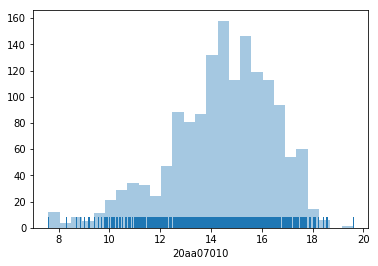

In [15]:
sns.distplot(np.log1p(train.loc[train[column] != 0,column]),kde=False,rug=True)

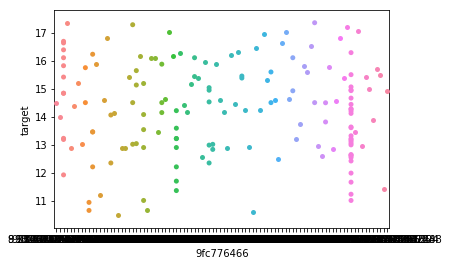

In [18]:
column = '9fc776466'
sns.stripplot(x=np.log1p(train.loc[train[column] != 0,column]),y=np.log1p(train.loc[train[column] != 0,'target']))
#plt.xticks(np.arange(min(np.log1p(train.loc[train['9fc776466'] != 0,'adf119b9a'])), max(np.log1p(train.loc[train['adf119b9a'] != 0,'adf119b9a']))+1, 1.0))

187
[4.00000000e+07 5.00000000e+07 2.50000000e+07 2.80000000e+07
 3.83333333e+07 1.56200000e+08 2.00000000e+07 3.00000000e+07
 7.50000000e+07 6.47500000e+07 7.83875000e+07 3.30000000e+07
 5.70714286e+07 4.50000000e+07 2.66666667e+07 3.25000000e+07
 3.80000000e+07 6.00000000e+07 3.40000000e+07 4.12500000e+07
 4.57142857e+07 3.50000000e+07 3.33333333e+07 7.05916667e+07
 3.42857143e+07 3.70000000e+07 4.83333333e+07 2.30000000e+08
 4.66666667e+07 4.28571429e+07 4.42857143e+07]
17.50439003707821
17.72753358339242
17.85981419178738
3770    17.129697
Name: target, dtype: float64
3770    27500000.0
Name: target, dtype: float64


"\nsample = sample.drop(['ID','target'])\nsample = pd.concat([sample,nonzero_corr],axis=1)\n\nsample[sample['value'].notnull() & (sample['value'] != 0)]\n"

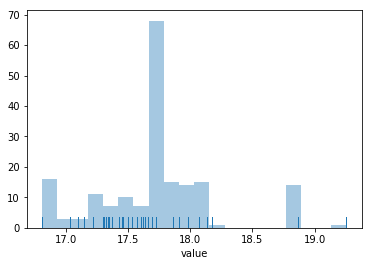

In [164]:
sample = train_x[train_x['ID'] == 'd7122327e'].T
sample.columns = ['value']

print(sample.loc[sample['value'] != 0,'value'].shape[0])
print(sample.loc[sample['value'] != 0,'value'].unique()[:-2].astype(float))
sns.distplot(np.log1p(sample.loc[sample['value'] != 0,'value'][:-2].astype(float)),kde=False,rug=True)

print(np.percentile(np.log1p(sample.loc[sample['value'] != 0,'value'][:-2].astype(float)),25))
print(np.percentile(np.log1p(sample.loc[sample['value'] != 0,'value'][:-2].astype(float)),50))
print(np.percentile(np.log1p(sample.loc[sample['value'] != 0,'value'][:-2].astype(float)),75))

print(np.log1p(train_x[train_x['ID'] == 'd7122327e']['target']))
print(train_x[train_x['ID'] == 'd7122327e']['target'])
'''
sample = sample.drop(['ID','target'])
sample = pd.concat([sample,nonzero_corr],axis=1)

sample[sample['value'].notnull() & (sample['value'] != 0)]
'''

In [134]:
np.log1p(515000)

13.151924121391561

In [58]:
nonzero_corr_2 = nonzero_corr.T
nonzero_corr_2['ID'] = ['1111','2222']
nonzero_corr_2['target'] = [1,1]
train_3 = train.append(nonzero_corr_2)

In [102]:
column='88d29cfaf'
train_2 = train[train[column] != 0][['ID','target',column]]
train_2['ratio'] = train_2['target']/train_2[column]
train_2['useful'] = train_2['ratio'].apply(lambda x: 1 if (x<3) and (x>0.3) else 0)
train_2

ID       target    88d29cfaf        ratio  useful
8     004b92275    979000.00     16000.00    61.187500       0
9     0067b4fef    460000.00   1100000.00     0.418182       1
22    0110c05db   6140000.00    972000.00     6.316872       0
25    012d8bc84    400000.00    238000.00     1.680672       1
35    017ad263f   6000000.00   2500000.00     2.400000       1
48    027484f21  13200000.00   2000000.00     6.600000       0
51    02aa73470  10050000.00    120000.00    83.750000       0
60    02fc56b21  20000000.00     14000.00  1428.571429       0
62    031ddd56a    680000.00   2600000.00     0.261538       0
68    035419398   1068000.00   3218000.00     0.331883       1
81    042cdc62a   3925333.34     16000.00   245.333334       0
95    056c44518  30000000.00  32500000.00     0.923077       1
114   06cd03d09   3095200.00    210000.00    14.739048       0
123   0733849bd    600000.00   4600000.00     0.130435       0
126   0770e5ca3  20000000.00   1400000.00    14.285714       0
127   077787b5d  10814666.66    140000.00    77.247619       0
143   08557af71  32000000.00  20000000.00     1.600000       1
151   08c1f91b0    200000.00    598857.14     0.333969       1
154   08d27660b   3734230.76   3245000.00     1.150764       1
181   0a730d90b   1400000.00   2500000.00     0.560000       1
193   0b132f2c6    500000.00   1470000.00     0.340136       1
197   0b59b910e   1900000.00    500000.00     3.800000       0
211   0c5b5c1e0    300000.00    120000.00     2.500000       1
213   0c97eddd2  10000000.00    354000.00    28.248588       0
230   0d933b6ac  30000000.00  30000000.00     1.000000       1
245   0e8c830c4   1477600.00   1470000.00     1.005170       1
251   0f2e84a29   1610000.00   5090000.00     0.316306       1
278   10e824dbb  18062333.34    150000.00   120.415556       0
284   1160f5e79  10200000.00    354000.00    28.813559       0
298   1240432e8   4000000.00   2000000.00     2.000000       1
302   125046869   2000000.00    500000.00     4.000000       0
303   1254c44d0  10000000.00    354000.00    28.248588       0
314   12b150758   1809333.34   1890000.00     0.957319       1
359   1550e27bb    980000.00    354000.00     2.768362       1
367   15d255c9e   2000000.00    100000.00    20.000000       0
375   1653b322d  16991333.34   3559333.34     4.773740       0
378   16a02e67a   2352551.72   1470000.00     1.600375       1
380   16ac64d07    350000.00    354000.00     0.988701       1
392   1739fb8c4  20000000.00   2200000.00     9.090909       0
399   17f9d8c9c   4500000.00    120000.00    37.500000       0
404   18516f2bb   3342666.66    952000.00     3.511204       0
418   18d789f9f    370000.00     60000.00     6.166667       0
423   1902ba327   1933333.34    181333.34    10.661764       0
451   1a65e321b  28000000.00  20000000.00     1.400000       1
467   1b28e8107  11326666.66     16000.00   707.916666       0
475   1b856e021   3320000.00    354000.00     9.378531       0
495   1d38c946c   3702000.00   3256000.00     1.136978       1
497   1d5579a73    950000.00     20000.00    47.500000       0
510   1dedfdbac  22000000.00  40000000.00     0.550000       1
511   1df3ca92e    296444.44   1470000.00     0.201663       0
521   1e6b7b391   4870000.00    120000.00    40.583333       0
524   1e872ba44   3000000.00   2500000.00     1.200000       1
532   1ef05eb96  33333333.34  20000000.00     1.666667       1
540   1f55f007a   2500000.00    500000.00     5.000000       0
553   1fec49750  30000000.00     16000.00  1875.000000       0
603   22cd3d13a   3743666.66   3740000.00     1.000980       1
611   23584ecf2   1500000.00    120000.00    12.500000       0
625   24204cd10    550000.00   1470000.00     0.374150       1
626   242407fc6  11115200.00    246000.00    45.183740       0
629   2432eb528   4000000.00    100000.00    40.000000       0
634   247290e41   5800000.00   1500000.00     3.866667       0
636   24781c050    387500.00    598857.14     0.647066       1
655   2534018eb   2050000.00   2000000.00   

In [101]:
iden = 'bca3a4023'
sample = train_3.loc[(train_3['ID'] == iden) | (train_3['ID'] == '1111') | (train_3['ID'] == '2222')]
sample = sample.T

sample['target'] = sample['target'].astype(float)
sample[(sample[3248] != 0) & ((sample['target'] > 0.2) | (sample['target'] < -0.3))].sort_values(['target'])

3248       target nonzero_cnt
dfcf7c0fa  1.50322e+08     0.201698         194
cc9c2fc87      2.6e+06     0.204978         177
5b233cf72     2.38e+07     0.211693         154
1af96abeb      2.6e+06     0.211727         165
0badd2fa2       600000     0.211784          89
d1e0f571b       200000     0.217672         574
bf89fac56      2.6e+06     0.224131         169
f8ccfa064      7.5e+06     0.226597         585
e4e9c8cc6   5.1896e+07     0.226828         193
dee843499      2.6e+06     0.231130         157
236cc1ff5      7.5e+06     0.236194         582
3c6980c42   1.9916e+07     0.236644         215
e16a20511      1.2e+07     0.237143         615
71c2f04c9      2.6e+06     0.242476         172
320931ca8       128000     0.244376         173
900045349      2.6e+06     0.245612         167
19915a6d3      7.5e+06     0.249214         549
453128993  1.50322e+08     0.252977         448
99e779ee0        2e+06     0.253025         602
9aa27017e      7.5e+06     0.257255         554
8618bc1fd       375111     0.257883         656
3a48a2cd2       400000     0.258529         697
a3ef69ad5       350667     0.260774         607
0397f7c9b       600000     0.263211         506
fe0dd1a15        8e+07     0.264001         178
2599a7eb7        6e+06     0.266430         461
1dd7bca9f        28000     0.268347         605
b9ba17eb6      3.1e+06     0.271736         591
482b04cba      7.5e+06     0.276089         548
632fed345        6e+06     0.279191         169
87a91f998       600000     0.286136         136
de4e75360    2.087e+06     0.287728         681
ee7e4581d       206000     0.287987          29
c3f400e36      7.5e+06     0.289058         539
86558e595      7.5e+06     0.289304         562
dd771cb8e      7.5e+06     0.295118         572
b3abb64d2      2.4e+07     0.295237         175
dbfa2b77f     2.38e+07     0.296669         541
1fa0f78d0  1.96633e+06     0.298235         548
ecb354edf     2.74e+06     0.300600         559
20305585c      7.5e+06     0.301348         566
4c2064b00        1e+06     0.301796         503
a79522786      2.6e+06     0.305205         166
2ce77a58f      7.5e+06     0.306149         542
645b47cde      2.6e+06     0.309847         167
3e568d6c3     1.56e+07     0.313214          14
a3fc511cd      7.5e+06     0.316162         585
f82167572       674000     0.320863         519
342e7eb03   4.8992e+07     0.322331         712
d0803e3a1      2.1e+06     0.323140         475
9c3154ae6     1.28e+07     0.323810         536
84ec1e3db        5e+06     0.324250         500
d7875bb6c      6.2e+06     0.329914         718
9b490abb3      1.2e+07     0.332097         474
190db8488       700000     0.335689        1528
2f26d70f4        18000     0.336775         549
b1c5346c4       194000     0.342908         163
f1e0ada11    3.481e+06     0.345615         680
c944a48b5      7.5e+06     0.349111         546
540cc3cd1    2.087e+06     0.349941         685
e176a204a       700000     0.354346        1535
6619d81fc       700000     0.355052        1533
fb0f5dbfe      4.1e+06     0.357266        1495
24018f832        2e+06     0.360845         485
0ff32eb98       700000     0.361124        1565
4b9540ab3    2.087e+06     0.361667         678
cd7f0affd      7.5e+06     0.364843         573
fb5f5836e      4.3e+06     0.365855         653
23310aa6f       700000     0.366651        1532
0d51722ca       300000     0.369175         764
c5a231d81       700000     0.369607        1565
91f701ba2       700000     0.370076        1560
65aa7f194       400000     0.371877         284
adb64ff71       700000     0.371921        1547
a7ac690a8      1.8e+06     0.371944         474
45f6d00da      1.4e+06     0.373892         650
251d1aa17      2.6e+06     0.374241         665
f72edfb37        2e+06     0.376068         205
0572565c2       700000     0.379296        1547
15ace8c9f       200000     0.380963        1485
f8cd9ae02    2.087e+06     0.383188         681
1db387535       700000     0.385282        1525
dcc269cfe       600000     0.38619

In [9]:
nonzero_corr

target  nonzero_cnt
48df886f9  0.828976           39
0deb4b6a8 -0.266614            4
34b15f335  0.161902           33
a8cb14b00  1.000000            2
2f0771a37  0.854765            5
30347e683 -0.044161           47
d08d1fbe3  0.328351            5
6ee66e115 -0.183215            5
20aa07010  0.391260         1494
dc5a8f1d8  0.279785          123
11d86fa6a  0.127497          165
77c9823f2       NaN            1
8d6c2a0b2  0.948722            6
4681de4fd  0.375900          519
adf119b9a  0.679541          160
cff75dd09  0.395286           35
96f83a237  0.100675           25
b8a716ebf  0.221538          334
6c7a4567c  0.462353           28
4fcfd2b4d -0.040860           27
f3b9c0b95  0.084186           39
71cebf11c -0.098613           21
d966ac62c  0.816984           79
68b647452  0.287278          131
c88d108c9 -0.570858           11
ff7b471cd  0.585383            4
d5308d8bc       NaN            0
0d866c3d7  0.231933          256
bc3f77679  0.023239           39
bd8f989f1  0.154903          560
...             ...          ...
cdfc2b069  0.162701          643
2a879b4f7  0.035122          218
6b119d8ce  0.795541          384
98dea9e42  0.998145            4
9f2471031       NaN            1
88458cb21  0.552050           13
f40da20f4  0.622391           19
7ad6b38bd  0.184466          102
c901e7df1  0.290510          175
8f55955dc -0.367970            9
85dcc913d  0.262077           89
5ca0b9b0c       NaN            1
eab8abf7a  0.108711          133
8d8bffbae  0.063401          457
2a1f6c7f9 -0.182831           33
9437d8b64  0.032297          332
5831f4c76  0.524750          712
2e84e09c5       NaN            1
d45fd5508  0.547271           32
a165f5761  0.300131          106
3ecc09859  0.205464          291
9281abeea  0.056582          185
8675bec0b  0.208062          693
3a13ed79a  0.127931          165
f677d4d13       NaN            1
71b203550  0.463140           35
137efaa80 -0.158129           18
fb36b89d9  0.235107           34
7e293fbaf -0.067779           80
9fc776466 -0.055116          163

[4991 rows x 2 columns]

In [112]:
#train_y = train['target']
#train_x = train.loc[:,(train.columns !='ID') & (train.columns != 'target')].loc[:,((nonzero_corr['target'] > 0) | (nonzero_corr['target'] < 0)) & (nonzero_corr['nonzero_cnt'] > 200)]
#test_x = test.loc[:,(test.columns != 'ID') & (test.columns != 'target')].loc[:,((nonzero_corr['target'] > 0) | (nonzero_corr['target'] < 0)) & (nonzero_corr['nonzero_cnt'] > 200)]
#train_x = train.loc[:,((nonzero_corr['target'] > 0) | (nonzero_corr['target'] > )) & (nonzero_corr['nonzero_cnt'] > 200)]

train_x = train.loc[:,(train.columns != 'ID') & (train.columns != 'target') & (train.columns != 'target_n')].loc[:,(((nonzero_corr['target'] < -0.05) | (nonzero_corr['target'] > 0.2)) & (nonzero_corr['nonzero_cnt'] > 200))]
train_x['target'] = train['target']
train_x['ID'] = train['ID']
#train_y = train['target_n']
#train_y = train_y.fillna(50)
#train_y

In [37]:
#train_1 = train[train['2f0771a37'] != 0][['target','2f0771a37']]
#train_1[['target','2f0771a37']].corr()

In [32]:
subpreds[subpreds > 5]

array([7.50168488, 8.59263619, 7.70179016, ..., 7.20022811, 8.25723284,
       8.96473133])

In [7]:
subpreds_1 = np.zeros(test.shape[0])
subpreds_2 = subpreds
subpreds_2[subpreds_2 < 10] = 10
subpreds_2[subpreds_2 > 90] = 90
for ind, row in test.iterrows():
    subpreds_1[ind] = np.percentile(np.log1p(row.unique()[1:].astype(float)),subpreds_2[ind])

In [21]:
subpreds_3 = subpreds_1
subpreds_3[subpreds_3 < 9] = 11.0
subpreds_3 = np.expm1(subpreds_3)
#pd.set_option('display.max_rows',3000)
#oofpreds_2 = pd.Series(oofpreds_1,name='preds')
#tmp = pd.concat([np.log1p(train['target']),oofpreds_2],axis=1)
#tmp['difference'] = (tmp['target']-tmp['preds'])**2
#tmp
#from sklearn.metrics import mean_squared_error
#print('Full Out-Of-Fold score : %9.6f' 
      #% (mean_squared_error(np.log1p(train['target']), oofpreds_2) ** .5))

Full Out-Of-Fold score :  1.066068


In [65]:
from sklearn.metrics import mean_squared_error
def fit_predict(data, y, test):
    # Create folds
    folds = KFold(n_splits=5, shuffle=True, random_state=1)
    # Init predictions
    sub_preds = np.zeros(test.shape[0])
    oof_preds = np.zeros(data.shape[0])
    # Convert to lightgbm Dataset
    dtrain = lgb.Dataset(data=data, label=y, free_raw_data=False)
    # Construct dataset so that we can use slice()
    dtrain.construct()
    lgb_params = {
        'objective': 'regression',
        'num_leaves': 58,
        'subsample': 0.6143,
        'colsample_bytree': 0.6453,
        'min_split_gain': np.power(10, -2.5988),
        'reg_alpha': np.power(10, -2.2887),
        'reg_lambda': np.power(10, 1.7570),
        'min_child_weight': np.power(10, -0.1477),
        'verbose': -1,
        'seed': 3,
        'boosting_type': 'gbdt',
        'max_depth': -1,
        'learning_rate': 0.05,
        'metric': 'l2',
    }
    # Run KFold
    for trn_idx, val_idx in folds.split(data):
        # Train lightgbm
        clf = lgb.train(
            params=lgb_params,
            train_set=dtrain.subset(trn_idx),
            valid_sets=dtrain.subset(val_idx),
            num_boost_round=10000, 
            early_stopping_rounds=100,
            verbose_eval=50
        )
        # Predict Out Of Fold and Test targets
        # Using lgb.train, predict will automatically select the best round for prediction
        oof_preds[val_idx] = clf.predict(dtrain.data.iloc[val_idx])
        #sub_preds += clf.predict(test.loc[:,(test.columns != 'ID')]) / folds.n_splits
        print(sub_preds)
        # Display current fold score
        print(mean_squared_error(np.log1p(y.iloc[val_idx]), 
                                 oof_preds[val_idx]) ** .5)
    # Display Full OOF score (square root of a sum is not the sum of square roots)
    print('Full Out-Of-Fold score : %9.6f' 
          % (mean_squared_error(np.log1p(y), oof_preds) ** .5))

    return oof_preds, sub_preds

In [70]:
#test_1 = test.loc[:,(test.columns != 'ID')]
[oof_preds, subpreds] = fit_predict(train_x_1,train_y,test)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l2: 806.167
[100]	valid_0's l2: 801.616
[150]	valid_0's l2: 806.461
[200]	valid_0's l2: 811.218
Early stopping, best iteration is:
[105]	valid_0's l2: 800.858
[0. 0. 0. ... 0. 0. 0.]
46.28256798316216
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l2: 734.592
[100]	valid_0's l2: 731.028
[150]	valid_0's l2: 734.928
Early stopping, best iteration is:
[71]	valid_0's l2: 728.698
[0. 0. 0. ... 0. 0. 0.]
46.00375593414769
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l2: 713.29
[100]	valid_0's l2: 711.048
[150]	valid_0's l2: 715.663
Early stopping, best iteration is:
[82]	valid_0's l2: 708.811
[0. 0. 0. ... 0. 0. 0.]
46.78134176496071
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's l2: 722.979
[100]	valid_0's l2: 714.831
[150]	valid_0's l2: 716.856
[200]	valid_0's l2: 716.267
Early stopping, best iteration is:
[103]	valid_0

In [54]:
train

ID       target    48df886f9  0deb4b6a8    34b15f335  a8cb14b00  \
0     000d6aaf2  38000000.00         0.00          0         0.00          0   
1     000fbd867    600000.00         0.00          0         0.00          0   
2     0027d6b71  10000000.00         0.00          0         0.00          0   
3     0028cbf45   2000000.00         0.00          0         0.00          0   
4     002a68644  14400000.00         0.00          0         0.00          0   
5     002dbeb22   2800000.00         0.00          0         0.00          0   
6     003925ac6    164000.00         0.00          0         0.00          0   
7     003eb0261    600000.00         0.00          0         0.00          0   
8     004b92275    979000.00         0.00          0         0.00          0   
9     0067b4fef    460000.00         0.00          0         0.00          0   
10    00689ee2c   1100000.00         0.00          0         0.00          0   
11    0069007ac  16000000.00         0.00          0         0.00          0   
12    006b60dd7    354000.00         0.00          0         0.00          0   
13    008057126   7000000.00         0.00          0         0.00          0   
14    008825875    100000.00         0.00          0         0.00          0   
15    0096e207e    800000.00         0.00          0         0.00          0   
16    00c2deb75    200000.00         0.00          0         0.00          0   
17    00ce2134f   3600000.00         0.00          0         0.00          0   
18    00e7ba121   2786000.00         0.00          0         0.00          0   
19    00ecc53f2     40000.00         0.00          0         0.00          0   
20    00fb69afe   1600000.00         0.00          0         0.00          0   
21    00fc78888   3266666.66         0.00          0         0.00          0   
22    0110c05db   6140000.00         0.00          0         0.00          0   
23    0126abf21  14886000.00         0.00          0         0.00          0   
24    012800ace    833333.34         0.00          0         0.00          0   
25    012d8bc84    400000.00         0.00          0         0.00          0   
26    012d9baab   6500000.00         0.00          0         0.00          0   
27    01346ebb9   1700000.00         0.00          0         0.00          0   
28    013842698    933333.34         0.00          0         0.00          0   
29    01432f2c7   4000000.00         0.00          0         0.00          0   
30    014aa259b    102000.00         0.00          0         0.00          0   
31    015a1c656  20000000.00         0.00          0         0.00          0   
32    0161ebeea   4666666.66         0.00          0         0.00          0   
33    0163ff75d  20000000.00         0.00          0         0.00          0   
34    01666d7a4    890000.00         0.00          0         0.00          0   
35    017ad263f   6000000.00         0.00          0         0.00          0   
36    01a09167b  20000000.00         0.00          0         0.00          0   
37    01b1dd07c   2000000.00         0.00          0         0.00          0   
38    01b4bd64a  18000000.00         0.00          0         0.00          0   
39    01b4c938b   6400000.00         0.00          0         0.00          0   
40    01bf430de  20000000.00         0.00          0         0.00          0   
41    01db20056  10000000.00         0.00          0         0.00          0   
42    020b34e31   5000000.00         0.00          0         0.00          0   
43    02111eb6f   9000000.00         0.00          0         0.00          0   
44    021f11b0c  34738000.00         0.00          0         0.00          0   
45    025b6897a   4000000.00         0.00          0         0.00          0   
46    026c1767f   1650000.00         0.00          0         0.00          0   
47    0270d1d7b   4500000.00         0.00          0         0.00          0   
48    027484f21  13200000.00         0.00          0         0.00          0   
49    028020c

In [88]:
oofpreds = pd.Series(oof_preds,name='pre_target')
train_y = train_y.rename('target')
train_y_1 = pd.concat([oofpreds,train_y],axis = 1)

In [89]:
train_y_1['ratio'] = np.sqrt((train_y_1['pre_target']-np.log1p(train_y_1['target']))**2)

In [95]:
train_y_2 = train_y_1.loc[train_y_1['ratio'] < 1.2,'target']
train_x_2 = train_x.loc[train_y_1['ratio'] < 1.2,:]

In [96]:
train_y_2.shape[0]

2729

In [136]:

params = {
    'max_depth': 8, 
    'learning_rate': 0.02, 
    'n_estimators': 1000, 
    'silent': True, 
    'objective': 'reg:linear', 
    'booster': 'gbtree', 
    'n_jobs': -1, 
    'gamma': 0.002,
    'min_child_weight': 5, 
    'subsample': 0.8, 
    'colsample_bytree': 0.7, 
    'colsample_bylevel': 0.7, 
    'reg_alpha': 0.002, 
    'reg_lambda': 1.0, 
    'random_state': 42}

params['tree_method'] = 'hist'
params['grow_policy'] = 'lossguide'
params['max_leaves']  = 31

test_x = test.loc[:,(test.columns != 'ID') & (test.columns != 'target')].loc[:,((nonzero_corr['target'] >= 0.2) | (nonzero_corr['target'] <= -0.2)) & (nonzero_corr['nonzero_cnt'] > 20)]

gbm = xgb.XGBRegressor(**params)
gbm.fit(train_x, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, gamma=0.002, grow_policy='lossguide',
       learning_rate=0.02, max_delta_step=0, max_depth=8, max_leaves=31,
       min_child_weight=5, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0.002, reg_lambda=1.0, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8, tree_method='hist')

In [98]:
customerid = test['ID']
#result = pd.Series(gbm.predict(test_x),name='target')
result = pd.Series(np.expm1(subpreds),name='target')
result = pd.concat([customerid,result],axis=1)


In [99]:
#min_value = train_y.min()
#result.loc[result['target'] < min_value,'target'] = min_value
result.to_csv('Santander_result_2.csv',index=False)